## Test migration history reconstruction on Sanborn et. al. Melanoma data

In [1]:
import sys
import os

repo_dir = os.path.join(os.getcwd(), "../")

from metient.metient import *

import matplotlib
import torch

matplotlib.rcParams['figure.figsize'] = [3, 3]
SANBORN_DATA_DIR = os.path.join(repo_dir, 'data', 'sanborn_melanoma_2015')
TREE_DIR = os.path.join(SANBORN_DATA_DIR, 'orchard_trees')    
TSV_DIR = os.path.join(SANBORN_DATA_DIR, 'pyclone_clustered_tsvs')                 

OUTPUT_DIR = os.path.join(SANBORN_DATA_DIR, "metient_outputs")

COLORS = ["#6aa84fff","#c27ba0ff", "#e69138ff", "#be5742e1", "#2496c8ff", "#674ea7ff"]

PATIENT_IDS = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
print_config = PrintConfig(visualize=True, k_best_trees=20)


CUDA GPU: False


### Run all patients in calibrate mode

Saving results to /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/sanborn_melanoma_2015/metient_outputs/calibrate
Overwriting existing directory at /lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/sanborn_melanoma_2015/metient_outputs/calibrate
Calibrating for patient: A_calibrate
Calculated batch size: 512


/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:307: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)
  0%|          | 0/75 [00:00<?, ?it/s]/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:298: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
100%|██████████| 75/75 [01:25<00:00,  1.14s/it]


{'not primary single-source seeding': 13, 'primary single-source seeding': 12}
# final solutions: 4
Calibrating for patient: B_calibrate
Calculated batch size: 512


100%|██████████| 75/75 [01:03<00:00,  1.17it/s]


{'primary single-source seeding': 10}
# final solutions: 4
Calibrating for patient: C_calibrate
Calculated batch size: 512


100%|██████████| 75/75 [01:01<00:00,  1.23it/s]


{'not primary single-source seeding': 13, 'primary single-source seeding': 11}
# final solutions: 9
Calibrating for patient: D_calibrate
Calculated batch size: 512


100%|██████████| 75/75 [01:38<00:00,  1.31s/it]


{'not primary single-source seeding': 18, 'primary single-source seeding': 14}
# final solutions: 2
Calibrating for patient: E_calibrate
Calculated batch size: 1024
Restructuring adjacency matrix for E_calibrate_Primary, left heel since root node is not at index 0


100%|██████████| 75/75 [02:49<00:00,  2.27s/it]


{'not primary single-source seeding': 19, 'primary single-source seeding': 17}
# final solutions: 11
Calibrating for patient: F_calibrate
Calculated batch size: 512


100%|██████████| 75/75 [01:03<00:00,  1.18it/s]


{'not primary single-source seeding': 17, 'primary single-source seeding': 14}
# final solutions: 4
Calibrating for patient: G_calibrate
Calculated batch size: 512


100%|██████████| 75/75 [00:07<00:00,  9.83it/s]


{'not primary single-source seeding': 11, 'primary single-source seeding': 9}
# final solutions: 1
Calibrating for patient: H_calibrate
Calculated batch size: 512


100%|██████████| 75/75 [00:09<00:00,  7.75it/s]


{'not primary single-source seeding': 13, 'primary single-source seeding': 11}
# final solutions: 3
Calibrating to 8 patients
Early stopping after 795 epochs.
Optimized thetas: tensor([0.6026, 0.1752, 0.2223], grad_fn=<DivBackward0>)


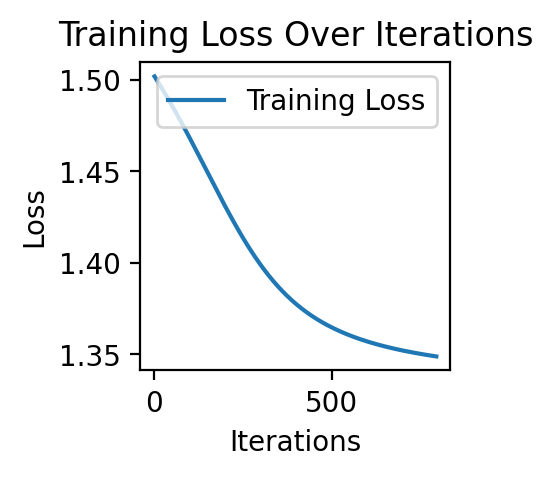

A_calibrate_Primary, forehead
20 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

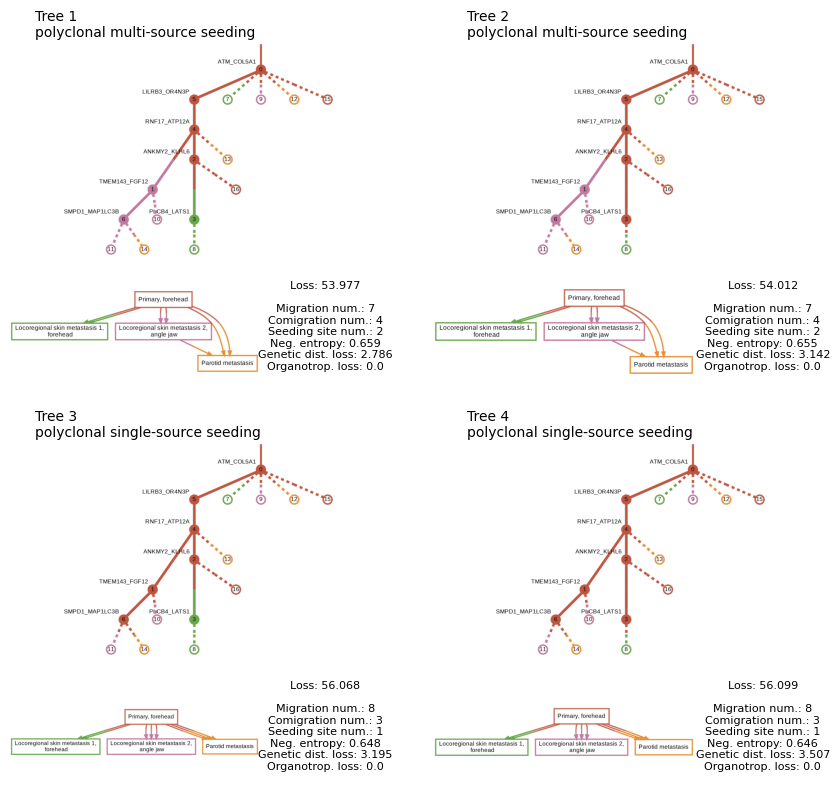

/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:298: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)


B_calibrate_Primary, mid-left back
20 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

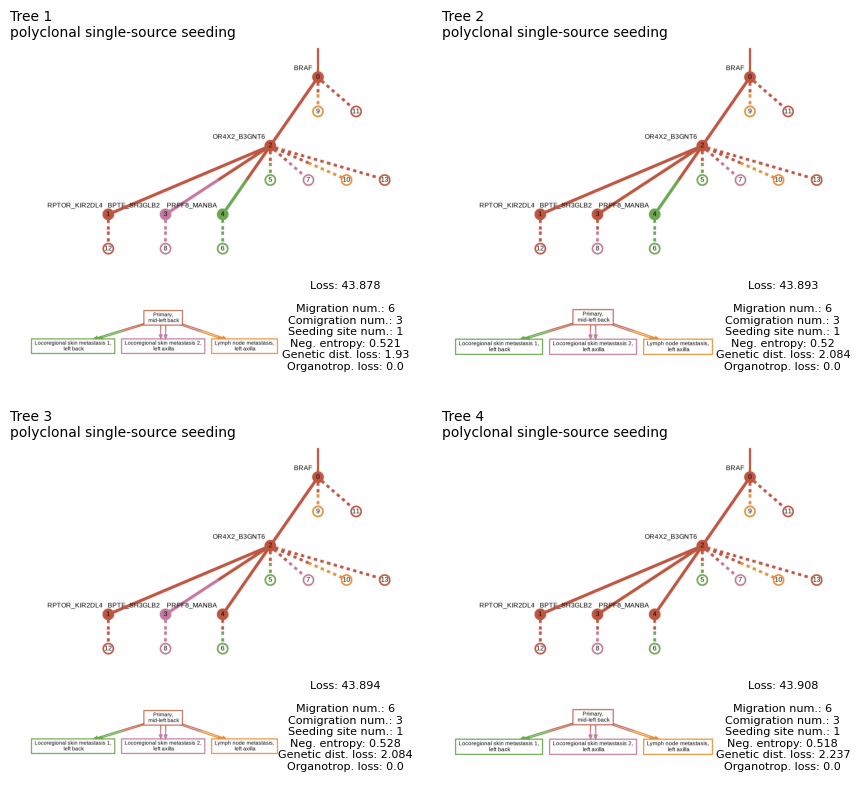

C_calibrate_Primary, right lower calf
20 unique trees were not found (9 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

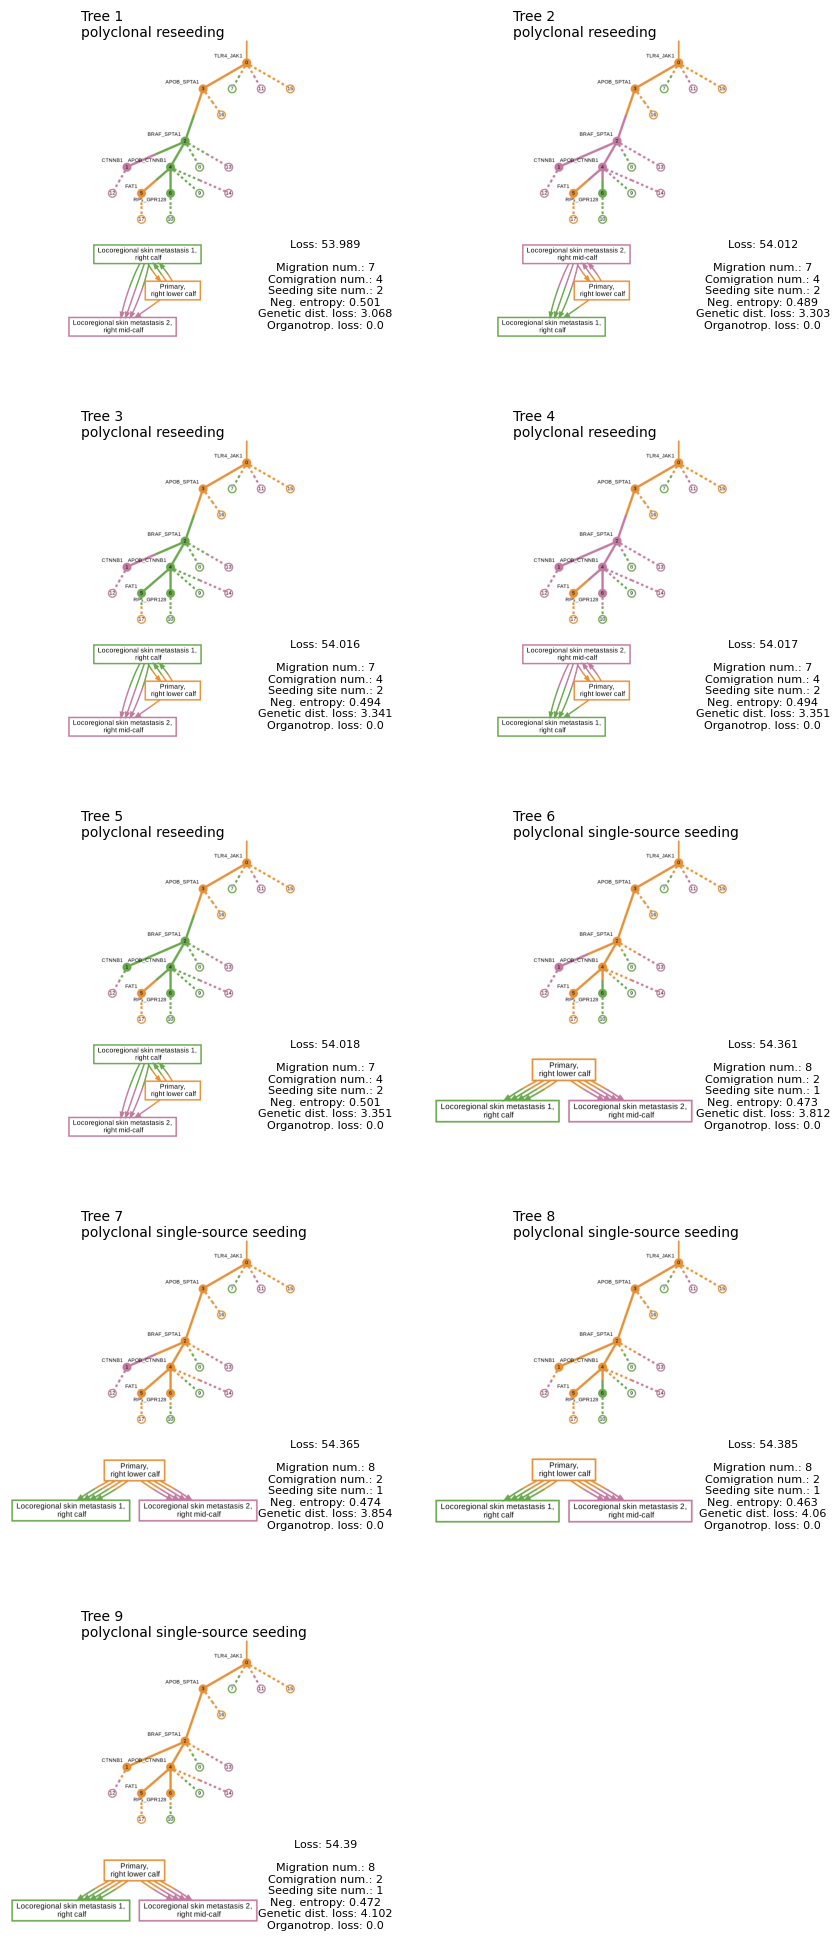

D_calibrate_Primary, right ankle
20 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

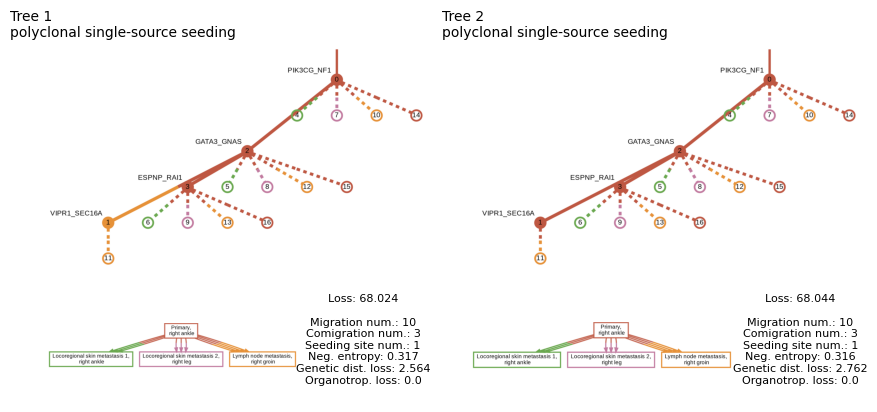

E_calibrate_Primary, left heel
20 unique trees were not found (11 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

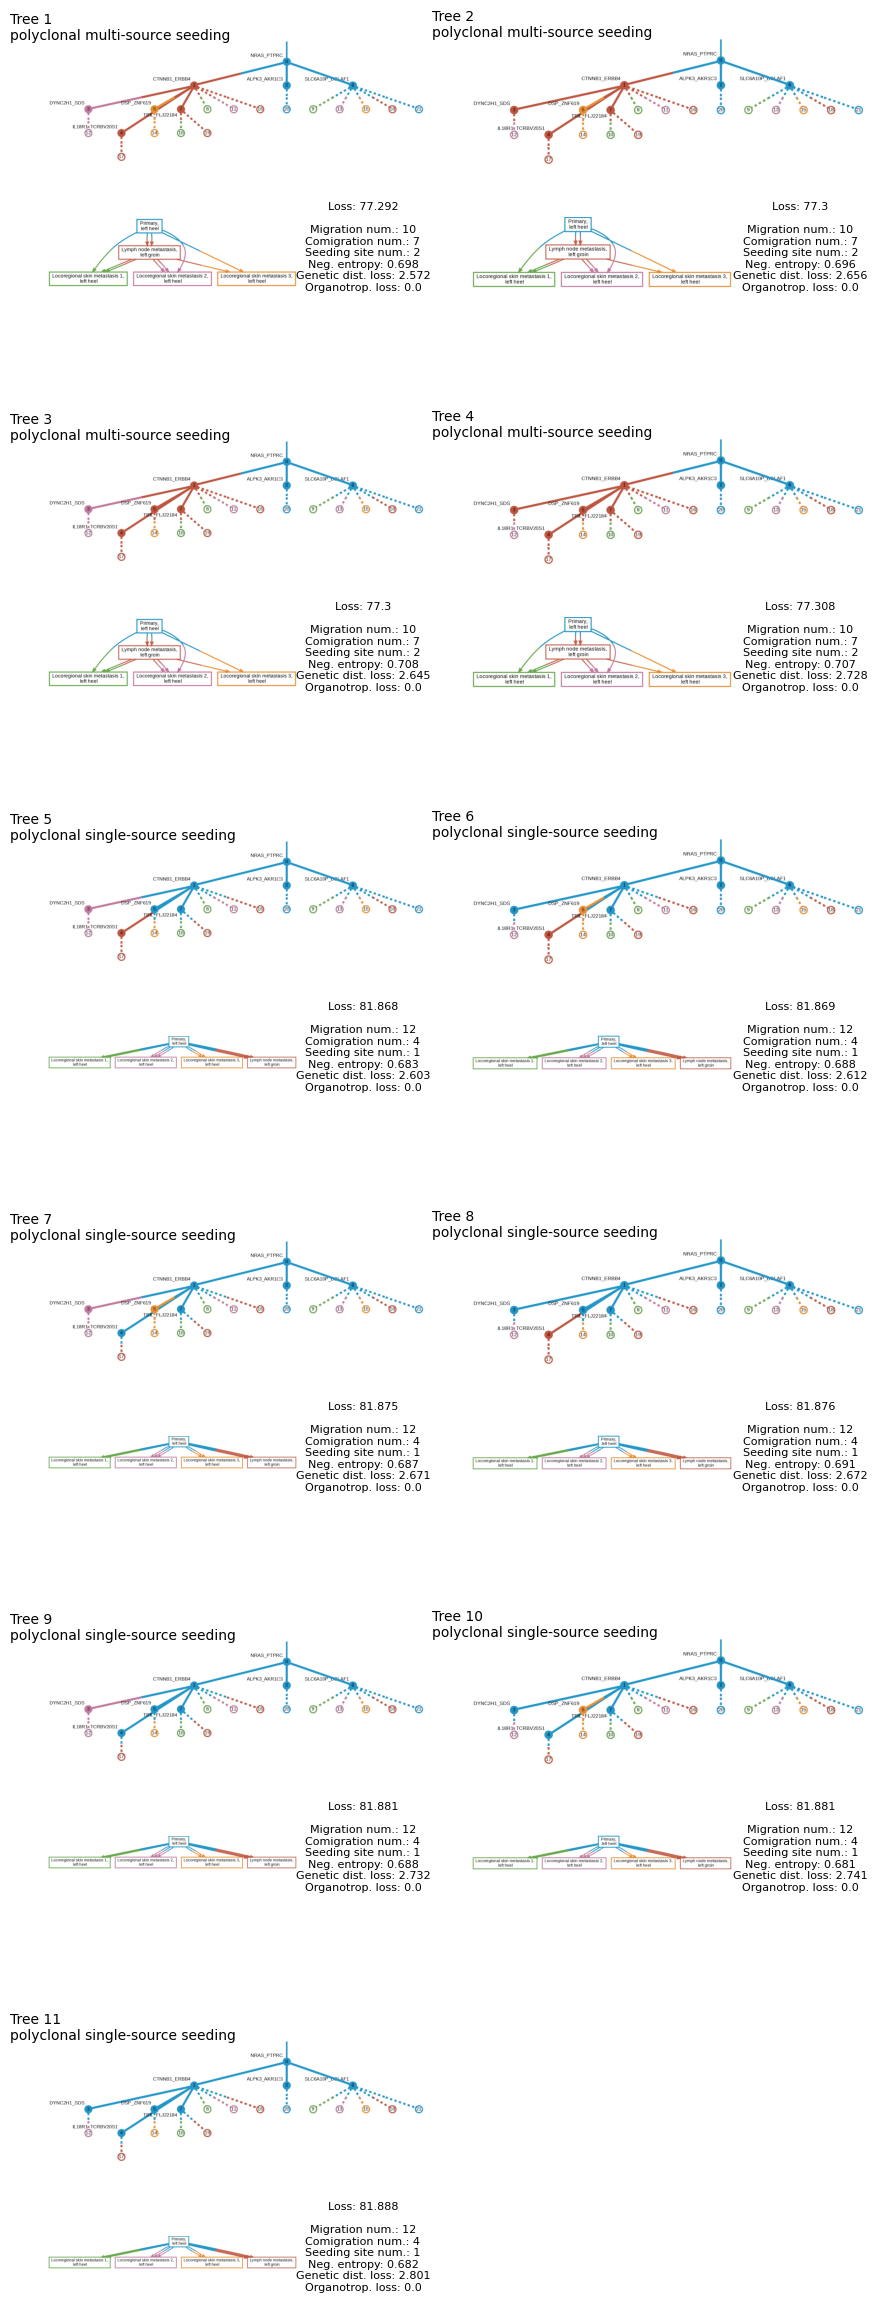

F_calibrate_Primary, left ear
20 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

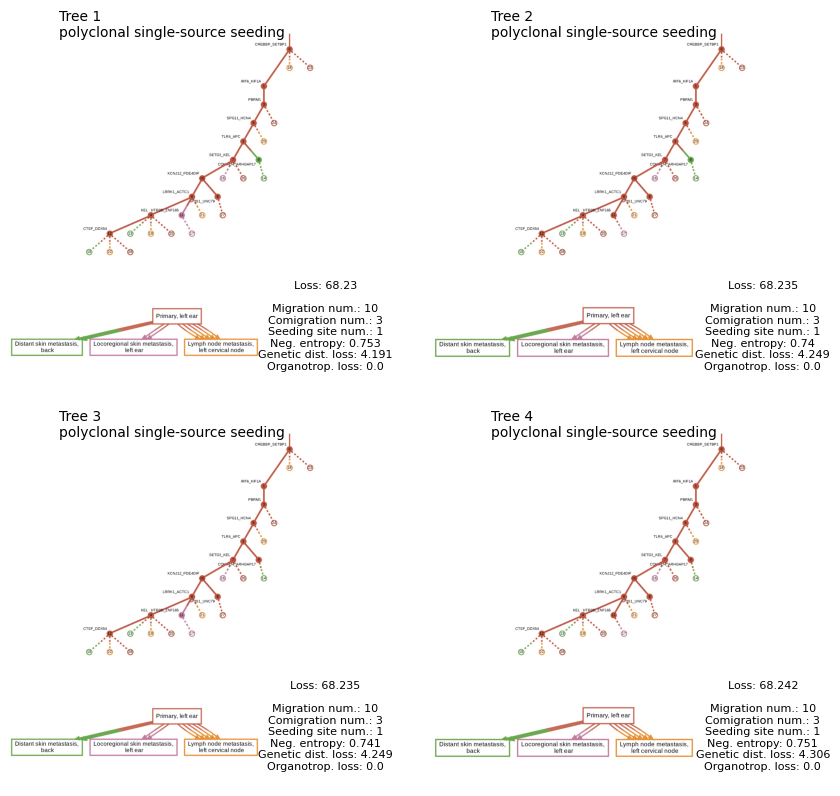

G_calibrate_Primary, right forearm
20 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

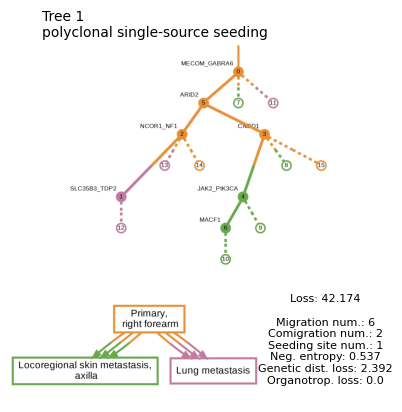

H_calibrate_Primary, right leg
20 unique trees were not found (3 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

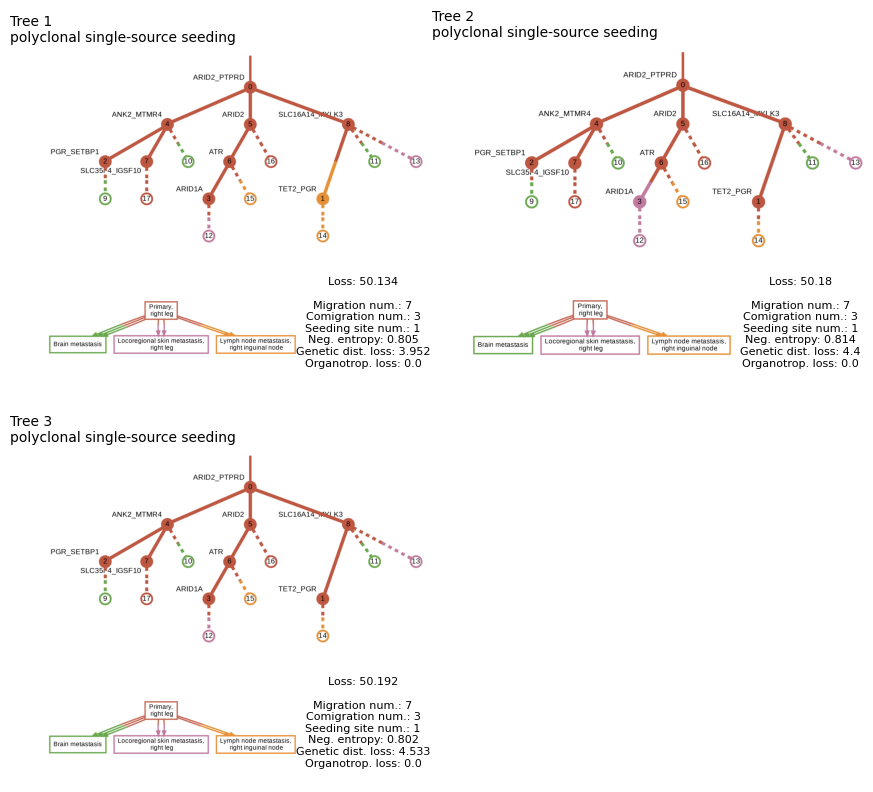

In [2]:
%%prun
mut_trees_fns = [os.path.join(TREE_DIR, f"{patient_id}.results.npz") for patient_id in PATIENT_IDS]
trees = [data[0] for data in get_adj_matrices_from_pairtree_results(mut_trees_fns)]
ref_var_fns = [os.path.join(TSV_DIR, f"patient{patient_id}_clustered_SNVs.tsv") for patient_id in PATIENT_IDS]
run_names = [f"{pid}_calibrate" for pid in PATIENT_IDS]

calibrate(trees, ref_var_fns, print_config, OUTPUT_DIR, run_names, bias_weights=True, custom_colors=COLORS, solve_polytomies=False)


### Run all patients in evaluate mode

In [3]:
from metient.util import data_extraction_util as dutil

def run_evaluate(mut_trees_fn, ref_var_fn, weights, run_name):    
    trees = get_adj_matrices_from_pairtree_results(mut_trees_fn)
    print("num trees:", len(trees))
   
    tree_num = 1
    for adj_matrix in trees[:1]:
        print(f"\nTREE {tree_num}")
        print(adj_matrix.shape)

        evaluate(adj_matrix, ref_var_fn, weights, print_config, OUTPUT_DIR, f"{run_name}_tree{tree_num}",
                 O=None, bias_weights=True, custom_colors=COLORS, solve_polytomies=False)
        tree_num += 1
        

num trees: 1

TREE 1
torch.Size([7, 7])
Calculated batch size: 512


/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:307: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)
100%|██████████| 75/75 [00:21<00:00,  3.42it/s]


{'primary single-source seeding': 11, 'not primary single-source seeding': 13}
# final solutions: 4


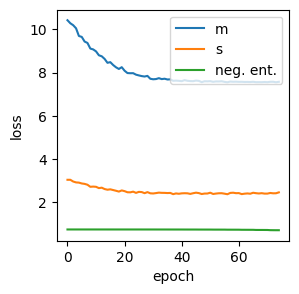

A_evaluate_tree1_Primary, forehead
20 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

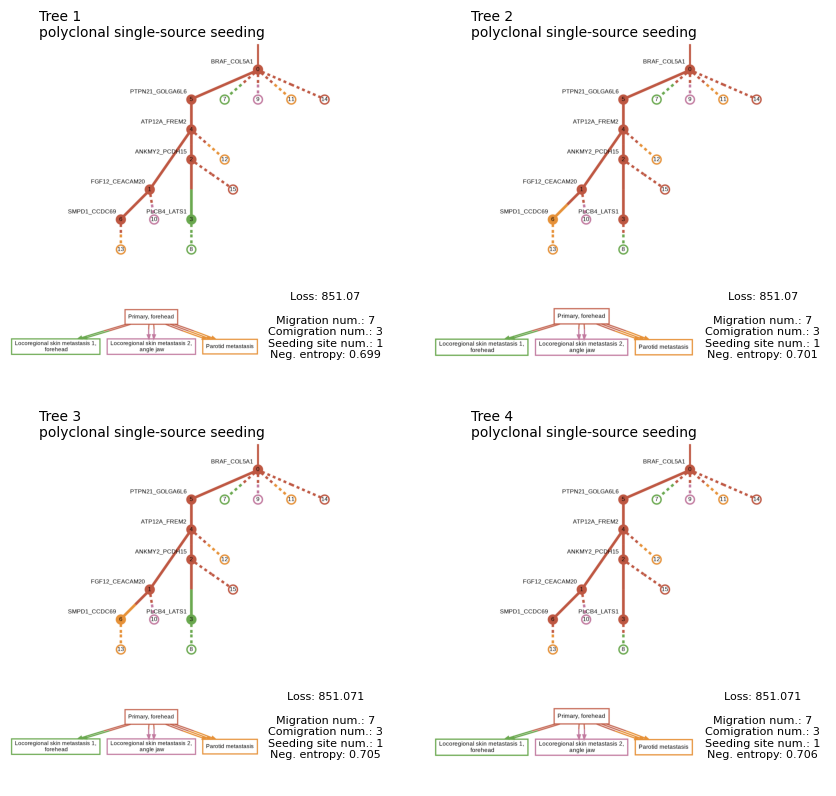

num trees: 1

TREE 1
torch.Size([5, 5])
Calculated batch size: 512


100%|██████████| 75/75 [00:20<00:00,  3.71it/s]


{'primary single-source seeding': 10, 'not primary single-source seeding': 14}
# final solutions: 4


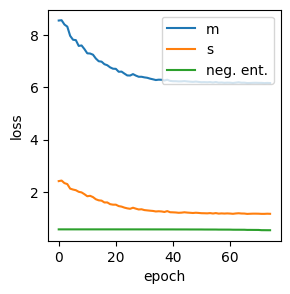

B_evaluate_tree1_Primary, mid-left back
20 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

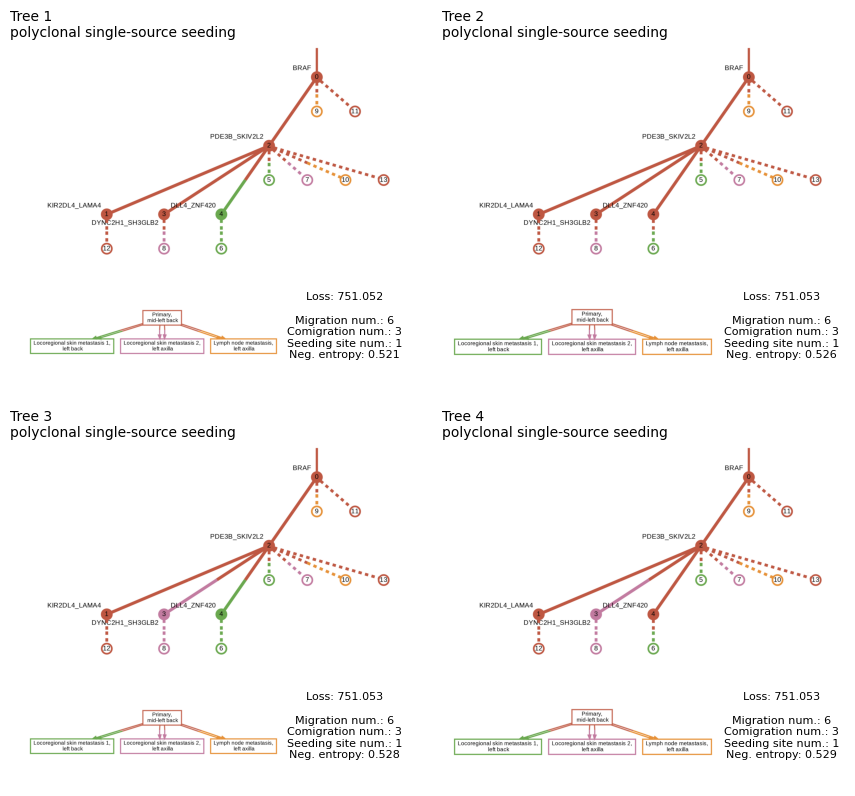

num trees: 1

TREE 1
torch.Size([7, 7])
Calculated batch size: 512


100%|██████████| 75/75 [00:23<00:00,  3.23it/s]


{'primary single-source seeding': 9, 'not primary single-source seeding': 10}
# final solutions: 6


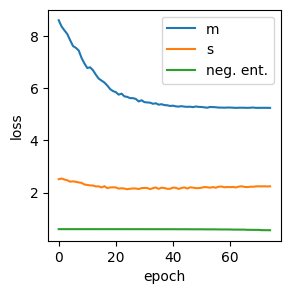

C_evaluate_tree1_Primary, right lower calf
20 unique trees were not found (6 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

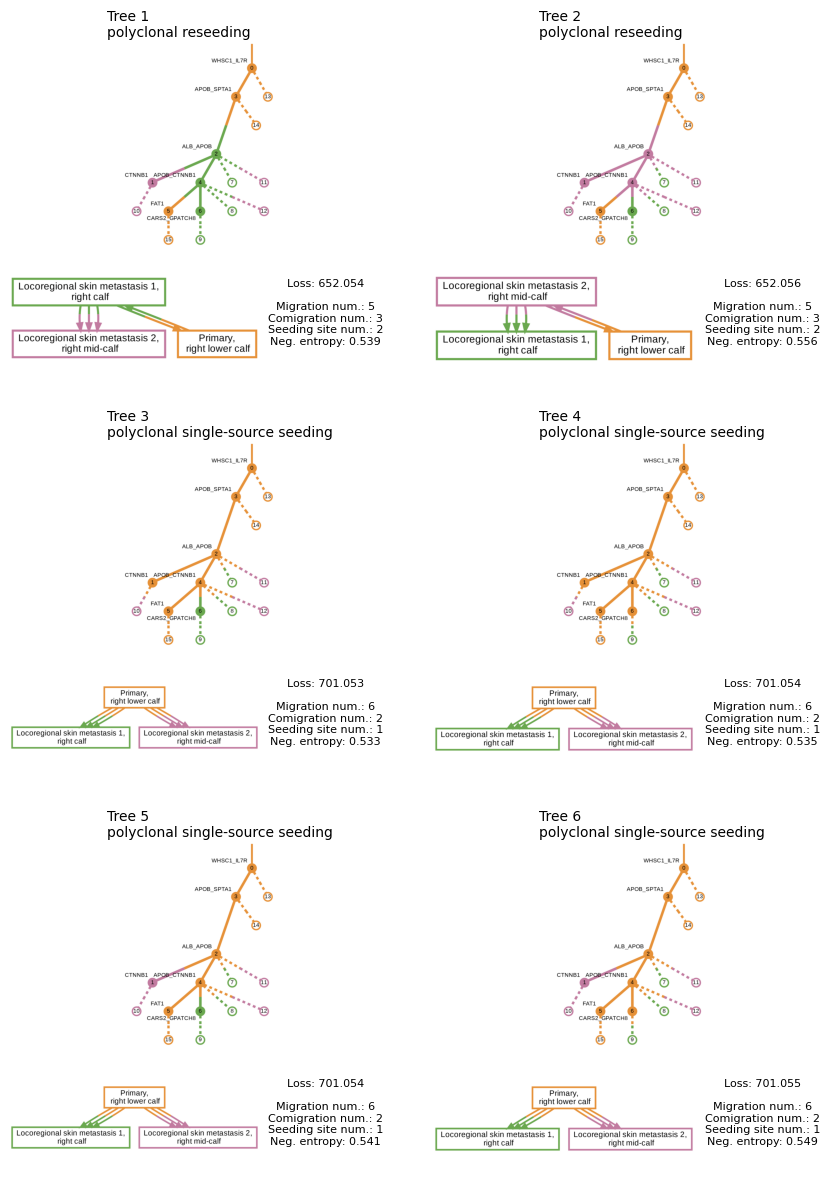

num trees: 1

TREE 1
torch.Size([4, 4])
Calculated batch size: 512


100%|██████████| 75/75 [00:24<00:00,  3.10it/s]


{'primary single-source seeding': 14, 'not primary single-source seeding': 18}
# final solutions: 2


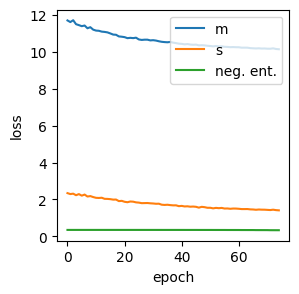

D_evaluate_tree1_Primary, right ankle
20 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

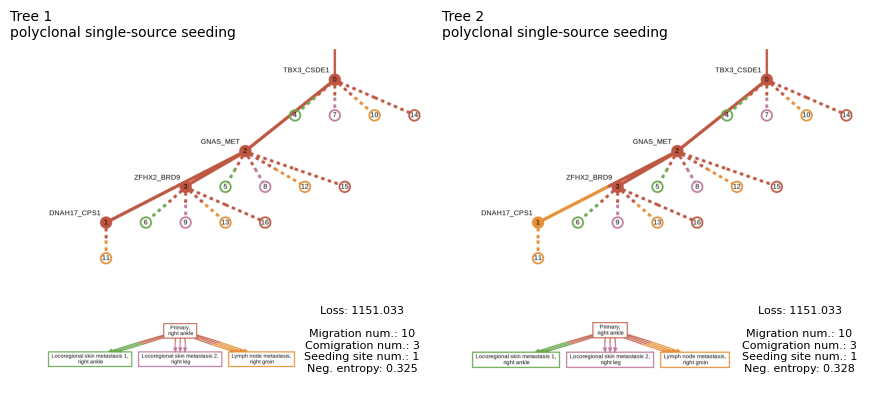

num trees: 1

TREE 1
torch.Size([8, 8])
Calculated batch size: 1024
Restructuring adjacency matrix for E_evaluate_tree1_Primary, left heel since root node is not at index 0
tensor([[0., 1., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 1., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]]) 
 tensor([[9142., 1138., 2071., 3018., 5794., 1594.,  798.,  255.],
        [9937., 1037., 2294., 1761., 6304., 1644.,  804.,  306.],
        [8020.,  764., 1997., 2520., 5194.,  845.,  685.,  271.],
        [8295., 1036., 1737., 2831., 3717., 1470.,  613.,  218.],
        [8590., 1803., 1234., 2407., 4477., 1261.,  621.,  217.]]) 
 tensor([[8.0480e+03, 9.2900e+02, 3.0000e+00, 4.0000e+01, 4.0000e+00, 2.0000e+00,
         1.1600e+02, 4.6000e+01],
        [8.4300e+03, 1.0120e+03, 0.0000e

100%|██████████| 75/75 [00:30<00:00,  2.44it/s]


{'primary single-source seeding': 17, 'not primary single-source seeding': 19}
# final solutions: 4


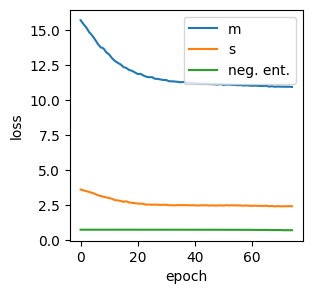

E_evaluate_tree1_Primary, left heel
20 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

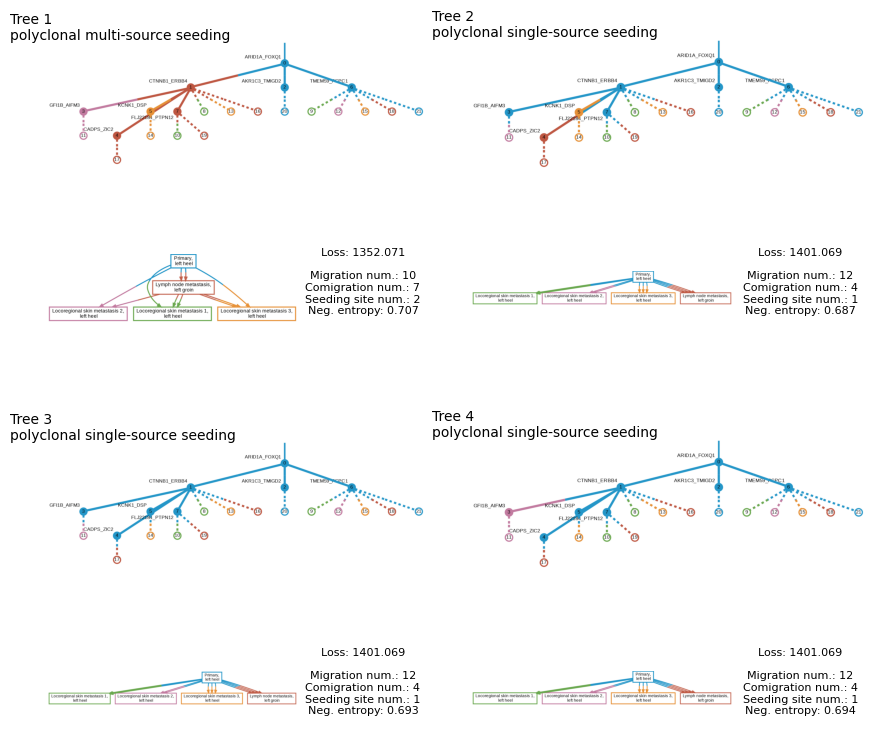

num trees: 1

TREE 1
torch.Size([13, 13])
Calculated batch size: 512


100%|██████████| 75/75 [00:30<00:00,  2.46it/s]


{'primary single-source seeding': 12, 'not primary single-source seeding': 16}
# final solutions: 8


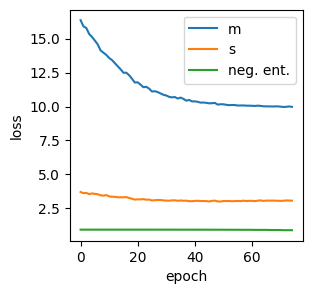

F_evaluate_tree1_Primary, left ear
20 unique trees were not found (8 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

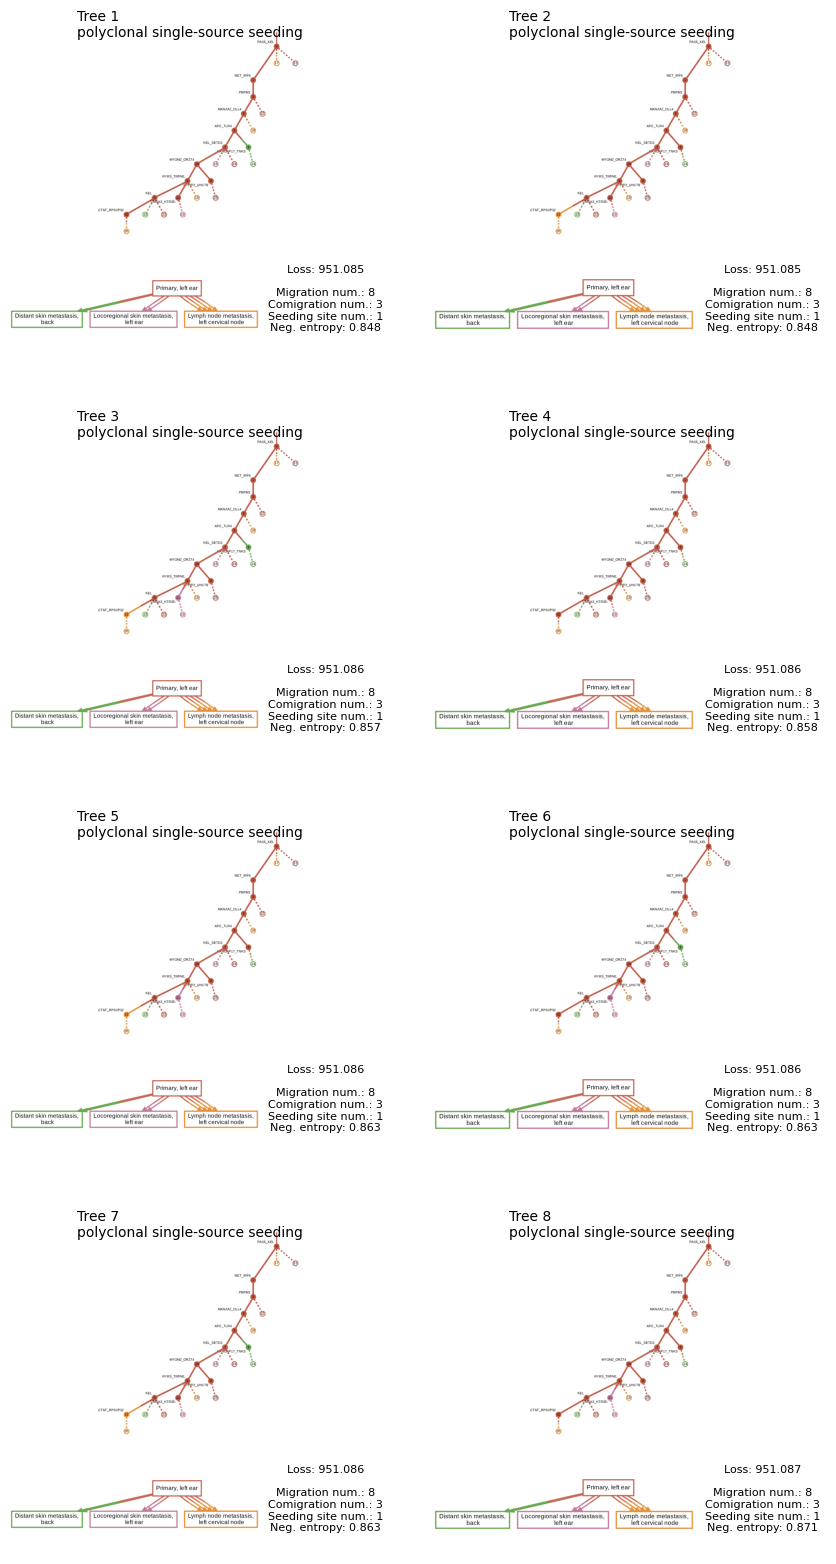

num trees: 1

TREE 1
torch.Size([7, 7])
Calculated batch size: 512


100%|██████████| 75/75 [00:20<00:00,  3.58it/s]


{'primary single-source seeding': 7, 'not primary single-source seeding': 9}
# final solutions: 2


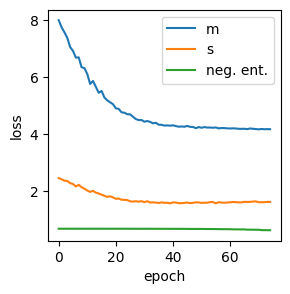

G_evaluate_tree1_Primary, right forearm
20 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

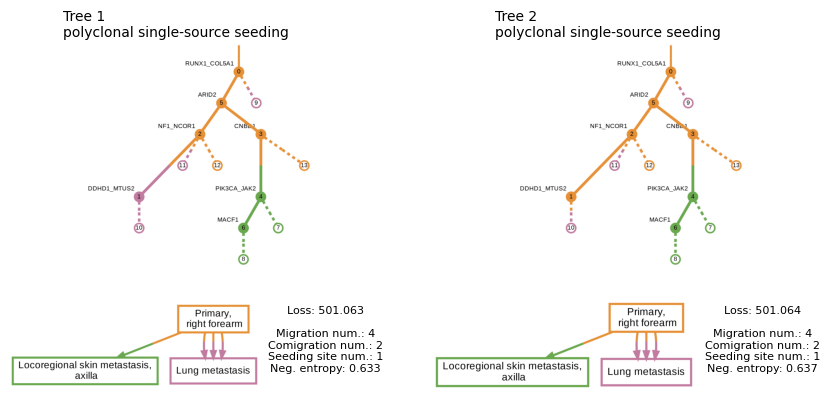

num trees: 1

TREE 1
torch.Size([9, 9])
Calculated batch size: 512


100%|██████████| 75/75 [00:22<00:00,  3.39it/s]


{'primary single-source seeding': 11, 'not primary single-source seeding': 13}
# final solutions: 4


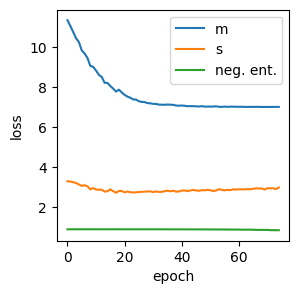

H_evaluate_tree1_Primary, right leg
20 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

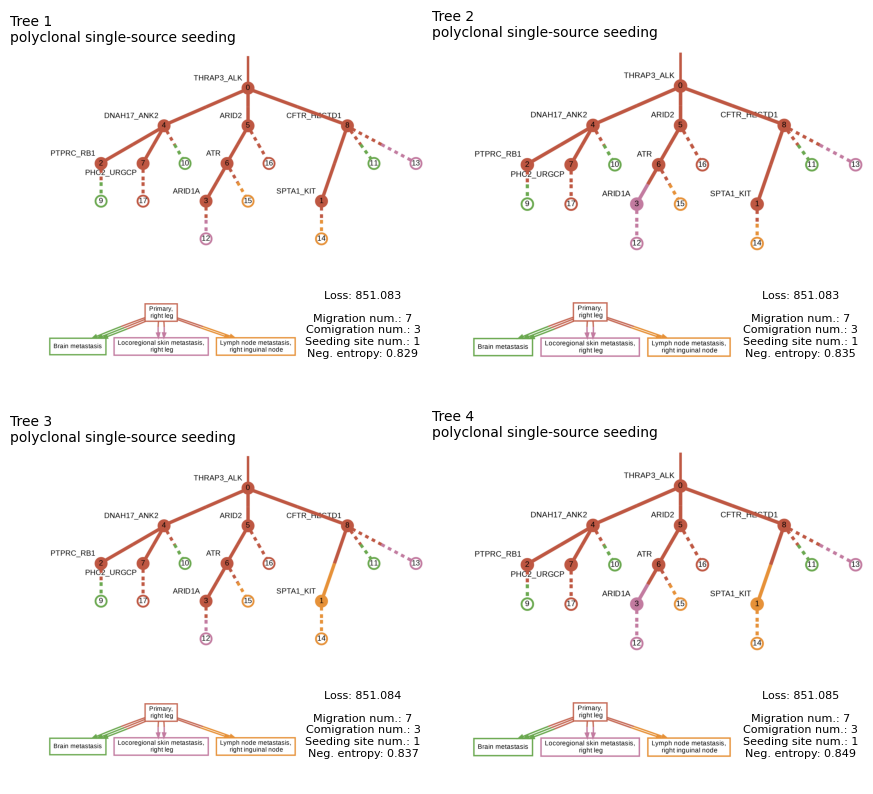

In [4]:
for patient_id in PATIENT_IDS:
    mut_trees_fn = os.path.join(TREE_DIR, f"{patient_id}.results.npz")
    ref_var_fn = os.path.join(TSV_DIR, f"patient{patient_id}_clustered_SNVs.tsv")
    weights = Weights(mig=100.0, comig=50.0, seed_site=1.0, gen_dist=0.0, organotrop=0.0)
    run_evaluate(mut_trees_fn, ref_var_fn, weights, f"{patient_id}_evaluate")
    